In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 50

In [90]:
data = pd.read_table('bank-additional-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

['contact' 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous']


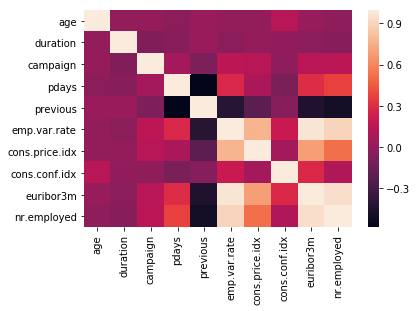

In [5]:
cols = data.iloc[:,7:14].columns.values
print cols
contact_details = pd.concat([data.iloc[:,7:14],data['y']])
sns.heatmap(data.corr())

In [6]:
contact_details.describe(include='all')

,0,campaign,contact,day_of_week,duration,month,pdays,previous
count,41188,41188.000000,41188,41188,41188.000000,41188,41188.000000,41188.000000
unique,2,NaN,2,5,NaN,10,NaN,NaN
top,no,NaN,cellular,thu,NaN,may,NaN,NaN
freq,36548,NaN,26144,8623,NaN,13769,NaN,NaN
mean,NaN,2.567593,NaN,NaN,258.285010,NaN,962.475454,0.172963
std,NaN,2.770014,NaN,NaN,259.279249,NaN,186.910907,0.494901
min,NaN,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,102.000000,NaN,999.000000,0.000000
50%,NaN,2.000000,NaN,NaN,180.000000,NaN,999.000000,0.000000
75%,NaN,3.000000,NaN,NaN,319.000000,NaN,999.000000,0.000000


In [7]:
np.unique(contact_details['contact'])


array([nan, nan, nan, ..., nan, 'cellular', 'telephone'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encode = pd.DataFrame()
for col in data.columns.values:
    data_encode[col] = le.fit_transform(data[col])
plt.figure(figsize=(10,10))
#sns.heatmap(data_encode.corr())

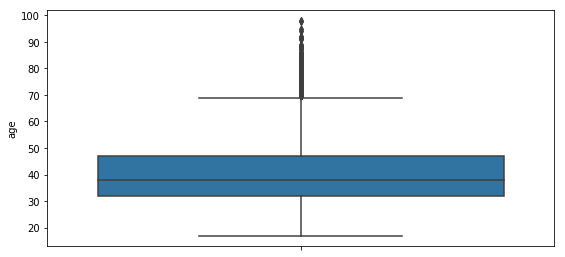

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(y=data['age'])

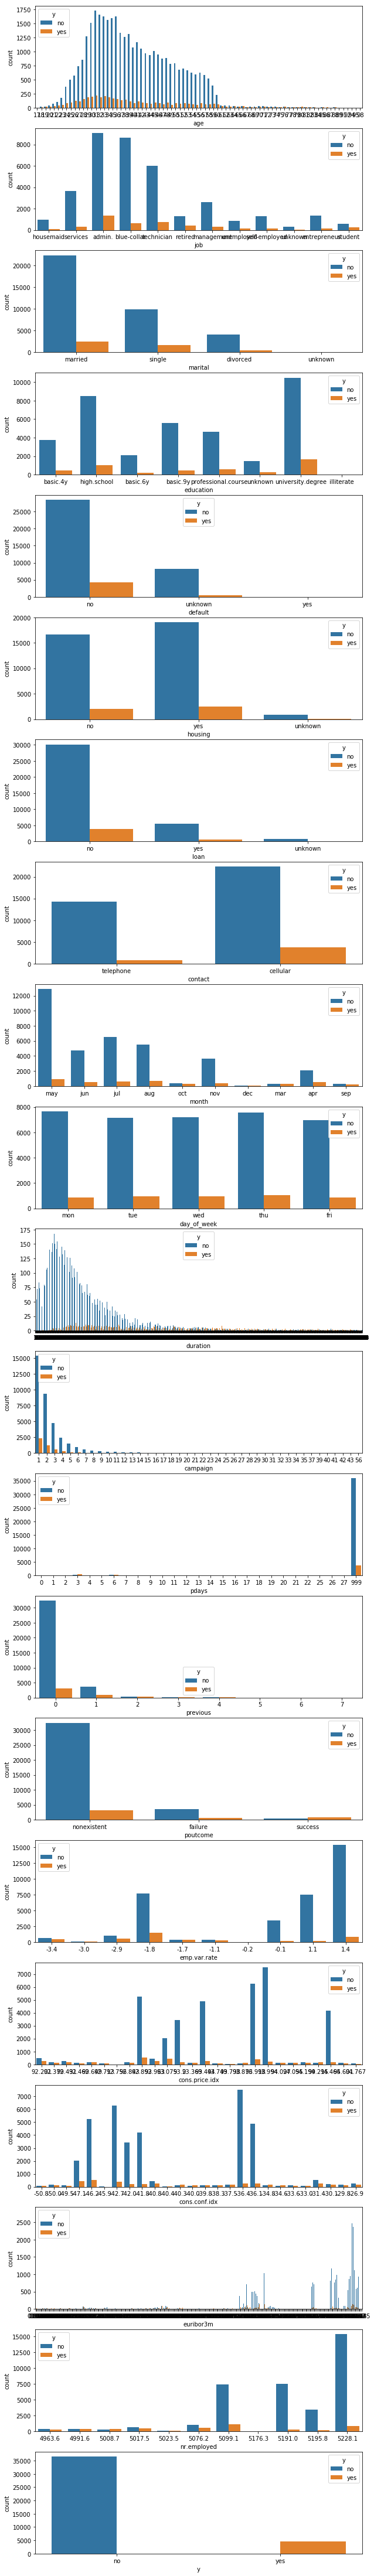

In [9]:
plt.figure(figsize=(10,80))
for i in range(0,len(data.columns.values)):
    plt.subplot(21,1,i+1)
    sns.countplot(data.iloc[:,i],hue=data.iloc[:,-1])

In [10]:
np.unique(data['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [13]:
len(data[data['y']=='yes'])

4640

In [14]:
len(data[data['y']=='no'])

36548

In [102]:
num_cols = data.select_dtypes(include=['int','float']).columns.values
data[num_cols].head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [103]:

#plt.figure(figsize=(7,20))
from sklearn.preprocessing import StandardScaler
stand_scale= StandardScaler()
data.loc[:,cols] = stand_scale.fit_transform(data.loc[:,cols])
'''a = 0
for i in num_cols:
    a = a + 1
    plt.subplot(5,1,a)
    sns.distplot(data.loc[:,i])'''

'a = 0\nfor i in num_cols:\n    a = a + 1\n    plt.subplot(5,1,a)\n    sns.distplot(data.loc[:,i])'

In [104]:
data['age'] = np.log(data['age'])

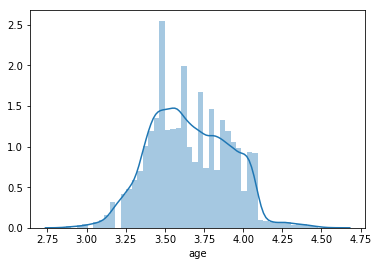

In [93]:
sns.distplot(data['age'],hist=True)

In [136]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [137]:
pd.crosstab(data['education'],data['y'])

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [91]:
data['education'] = data['education'].replace(['basic.4y', 'basic.6y','basic.9y'], 'school')
data['education'] = data['education'].replace(['professional.course', 'university.degree'], 'university')
data['education'] = data['education'].replace(['illiterate', 'unknown'], 'others')
data['education'] = data['education'].replace('high.school', 'high school')

In [142]:
pd.crosstab(data['education'],data['y'])

y,no,yes
education,,
high school,8484,1031
others,1494,255
school,11424,1089
university,15146,2265


In [143]:
x = pd.get_dummies(data['education'],prefix='edu',drop_first=True)
data = pd.concat([data, pd.get_dummies(data['education'],prefix='edu')], axis=1)
del data['education']
data.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,edu_high school,edu_others,edu_school,edu_university
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0


In [134]:
np.unique(data['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [92]:
data['job'] = data['job'].replace(['admin.', 'management'], 'white-collar')
data['job'] = data['job'].replace(['housemaid', 'services'], 'pink-collar')
data['job'] = data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'others')

In [151]:
pd.crosstab(data['job'],data['y'])

y,no,yes
job,,
blue-collar,8616,638
entrepreneur,1332,124
others,3049,890
pink-collar,4600,429
self-employed,1272,149
technician,6013,730
white-collar,11666,1680


In [152]:
data = pd.concat([data, pd.get_dummies(data['job'],prefix='job')], axis=1)
del data['job']
data.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,...,y,edu_high school,edu_others,edu_school,edu_university,job_blue-collar,job_entrepreneur,job_others,job_pink-collar,job_self-employed,job_technician,job_white-collar
0,56,married,no,no,no,telephone,may,mon,261,1,999,0,...,no,0,0,1,0,0,0,0,1,0,0,0
1,57,married,unknown,no,no,telephone,may,mon,149,1,999,0,...,no,1,0,0,0,0,0,0,1,0,0,0
2,37,married,no,yes,no,telephone,may,mon,226,1,999,0,...,no,1,0,0,0,0,0,0,1,0,0,0
3,40,married,no,no,no,telephone,may,mon,151,1,999,0,...,no,0,0,1,0,0,0,0,0,0,0,1
4,56,married,no,no,yes,telephone,may,mon,307,1,999,0,...,no,1,0,0,0,0,0,0,1,0,0,0


In [159]:
np.unique(data['default'])

array(['no', 'unknown', 'yes'], dtype=object)

In [160]:
pd.crosstab(data['default'],data['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [3]:
from sklearn.preprocessing import StandardScaler
cols = data.select_dtypes(include=['int','float']).columns.values
stand_scale= StandardScaler() 
data.loc[:,cols] = stand_scale.fit_transform(data.loc[:,cols])

In [20]:
del data['duration']

In [4]:
data['age'] = np.log(data['age'])

In [5]:
data['job'] = data['job'].replace(['admin.', 'management'], 'white-collar')
data['job'] = data['job'].replace(['housemaid', 'services'], 'pink-collar')
data['job'] = data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'others')
data['education'] = data['education'].replace(['basic.4y', 'basic.6y','basic.9y'], 'school')
data['education'] = data['education'].replace(['professional.course', 'university.degree'], 'university')
data['education'] = data['education'].replace(['illiterate', 'unknown'], 'others')
data['education'] = data['education'].replace('high.school', 'high school')

In [93]:
data_encode = pd.get_dummies(data=data, columns = ['job', 'marital', 'education', 'poutcome','loan','housing','default','month'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome','loan','housing','default','month'])

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encode['y'] = le.fit_transform(data['y'])
data_encode['contact'] = le.fit_transform(data['contact'])

In [95]:
del data_encode['duration']

In [96]:
del data_encode['day_of_week']

In [97]:
data_encode.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_others,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,marital_unknown,education_high school,education_others,education_school,education_university,poutcome_failure,poutcome_nonexistent,poutcome_success,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,57,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,37,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
3,40,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
np.unique(data_encode['campaign'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 37, 39, 40, 41, 42, 43, 56], dtype=int64)

In [17]:
data.select_dtypes(include=['int64','float']).columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype=object)

In [98]:
from sklearn.model_selection import train_test_split
y = data_encode.y
X = data_encode.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=43, test_size=0.2)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
pred_y_4 = clf_4.predict(X_test)
prob_y_4 = clf_4.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print(roc_auc_score(y_test, prob_y_4))

0.73599822945


In [101]:
lst = []
for feature in zip(X_train.columns.values, clf_4.feature_importances_):
    lst.append(feature)

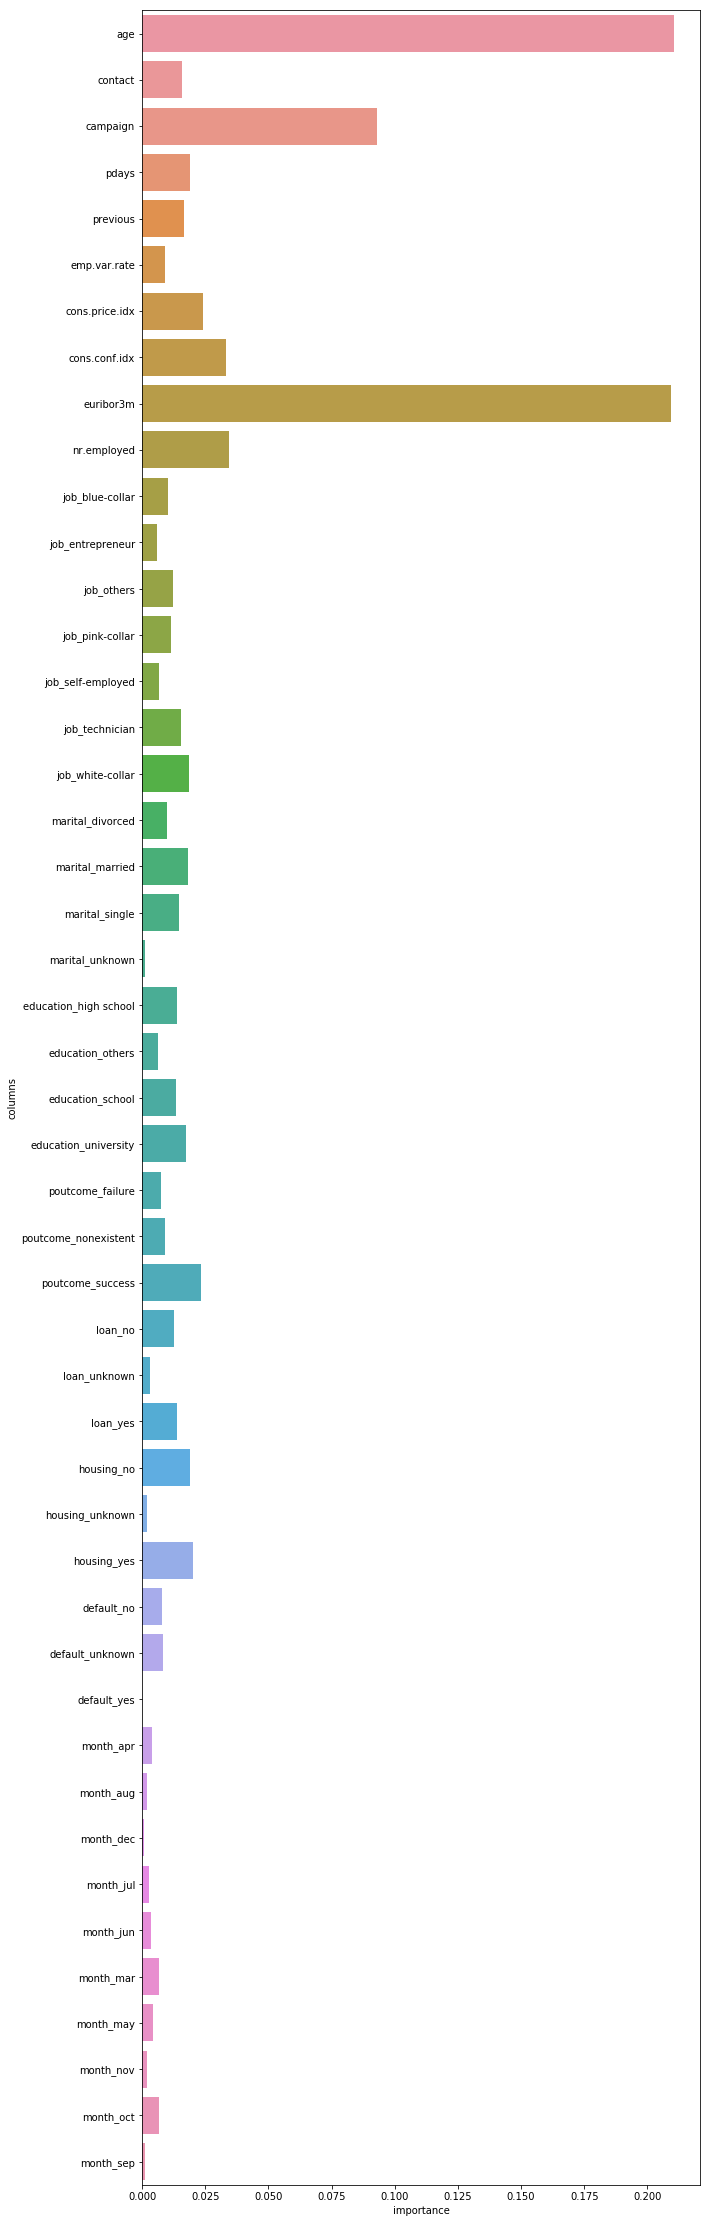

In [102]:
plt.figure(figsize=(10,40))
dd = pd.DataFrame(lst,columns=['columns','importance'])
sns.barplot(dd.iloc[:,1],dd.iloc[:,0])

In [111]:
imp_cols = list(dd.sort_values(by='importance',ascending=False)['columns'])
imp_cols

['age',
 'euribor3m',
 'campaign',
 'nr.employed',
 'cons.conf.idx',
 'cons.price.idx',
 'poutcome_success',
 'housing_yes',
 'pdays',
 'housing_no',
 'job_white-collar',
 'marital_married',
 'education_university',
 'previous',
 'contact',
 'job_technician',
 'marital_single',
 'education_high school',
 'loan_yes',
 'education_school',
 'loan_no',
 'job_others',
 'job_pink-collar',
 'job_blue-collar',
 'marital_divorced',
 'poutcome_nonexistent',
 'emp.var.rate',
 'default_unknown',
 'default_no',
 'poutcome_failure',
 'month_mar',
 'job_self-employed',
 'month_oct',
 'education_others',
 'job_entrepreneur',
 'month_may',
 'month_apr',
 'month_jun',
 'loan_unknown',
 'month_jul',
 'month_aug',
 'housing_unknown',
 'month_nov',
 'month_sep',
 'marital_unknown',
 'month_dec',
 'default_yes']

In [104]:
from sklearn.model_selection import train_test_split
y = data_encode.y
X = data_encode[imp_cols]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=43, test_size=0.2)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_5 = RandomForestClassifier()
clf_5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
prob_y_5 = clf_5.predict(X_test)
prob_y_5 = clf_5.predict_proba(X_test)
prob_y_5 = [p[1] for p in prob_y_5]
print(roc_auc_score(y_test, prob_y_5))

0.725647970262


In [108]:
X.head()

,age,euribor3m,campaign,nr.employed,cons.conf.idx,cons.price.idx,poutcome_success,housing_yes,pdays,housing_no
0,56,4.857,1,5191.0,-36.4,93.994,0,0,999,1
1,57,4.857,1,5191.0,-36.4,93.994,0,0,999,1
2,37,4.857,1,5191.0,-36.4,93.994,0,1,999,0
3,40,4.857,1,5191.0,-36.4,93.994,0,0,999,1
4,56,4.857,1,5191.0,-36.4,93.994,0,0,999,1
